# Residual network

In [1]:
import time
import keras
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

/opt/anaconda3/envs/py35gpu/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load data

In [2]:
n_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


### Format data

In [3]:
X_train = X_train.reshape(60000, 784) # convert 28x28 image becomes a single 784 dimensional vector. 
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # scale the inputs to be in the range [0-1] rather than [0-255]
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### Define simple model with just one inner layer

In [4]:
model_short = Sequential()
model_short.add(Dense(512, input_shape=(784,), activation='relu'))                           
model_short.add(Dropout(0.2))
model_short.add(Dense(n_classes, activation='softmax'))
model_short.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

### Define model training function with early stop

In [5]:
def train_model(model, max_epochs=100, n_early_stop_epochs=3, batch_size=128):
    callbacks = [
        keras.callbacks.ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True),  # save best model
        keras.callbacks.EarlyStopping(patience=n_early_stop_epochs, verbose=1)  # early stop
    ]
    t = time.time()
    history=model.fit(X_train, Y_train,
              batch_size=batch_size, epochs=max_epochs, verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks)
    t=time.time()-t
    
    model.load_weights('best_weights.h5')  # load best weights
    accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
    print('Test accuracy:', accuracy)
    print('Training time:',t ,'sec')
    return accuracy, t, history

### Train the model

In [6]:
accuracy_short, t_short, history_short = train_model(model_short)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3122 - acc: 0.9119 - val_loss: 0.1493 - val_acc: 0.9562
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1399 - acc: 0.9589 - val_loss: 0.1040 - val_acc: 0.9691
Epoch 3/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1007 - acc: 0.9703 - val_loss: 0.0868 - val_acc: 0.9728
Epoch 4/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0786 - acc: 0.9767 - val_loss: 0.0748 - val_acc: 0.9775
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0639 - acc: 0.9809 - val_loss: 0.0713 - val_acc: 0.9775
Epoch 6/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0550 - acc: 0.9839 - val_loss: 0.0644 - val_acc: 0.9803
Epoch 7/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0459 - acc: 0.9864 - val_loss: 0.0598 - 

### Let's view the training curves

In [7]:
def show_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.tight_layout()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(2,1,2)
    plt.tight_layout()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.show()

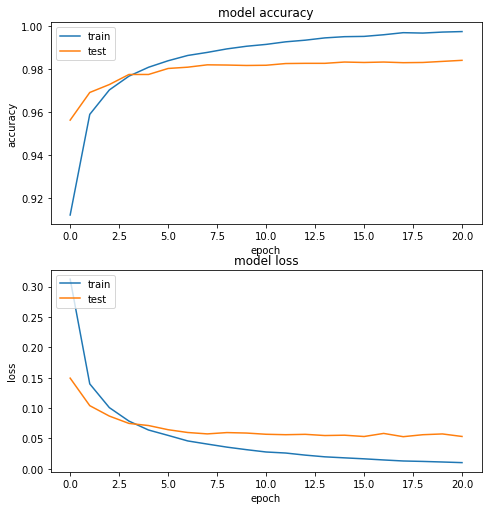

In [8]:
show_history(history_short)

### Define more complicated model with two extra layers

In [9]:
model_long = Sequential()
model_long.add(Dense(512, input_shape=(784,), activation='relu'))                           
model_long.add(Dropout(0.2))
for _ in range(2):
    model_long.add(Dense(512, activation='relu'))
    model_long.add(Dropout(0.2))
model_long.add(Dense(n_classes, activation='softmax'))
model_long.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

### Train it

In [10]:
accuracy_long, t_long, history_long = train_model(model_long)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.3018 - acc: 0.9059 - val_loss: 0.1237 - val_acc: 0.9626
Epoch 2/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1146 - acc: 0.9651 - val_loss: 0.0838 - val_acc: 0.9739
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0830 - acc: 0.9742 - val_loss: 0.0878 - val_acc: 0.9736
Epoch 4/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0639 - acc: 0.9806 - val_loss: 0.0852 - val_acc: 0.9738
Epoch 5/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0631 - val_acc: 0.9809
Epoch 6/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0402 - acc: 0.9869 - val_loss: 0.0651 - val_acc: 0.9813
Epoch 7/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0363 - acc: 0.9886 - val_loss: 0.0649 - 

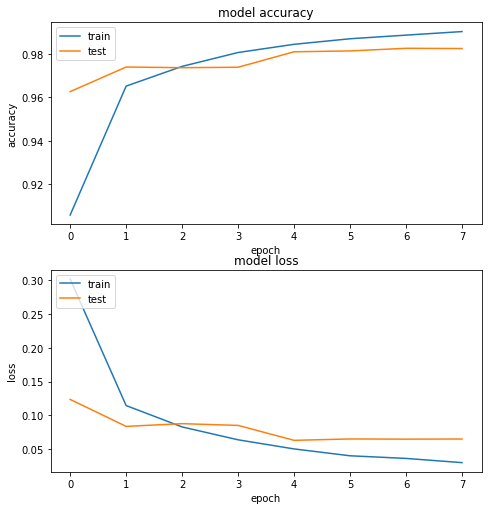

In [11]:
show_history(history_long)

## Define simple model excluding the output layer using Keras Functional API

Combine first two layers into a separate model

In [12]:
inp = keras.layers.Input(shape=(784,))
out = Dense(512, activation='relu')(inp)
out = Dropout(0.2)(out)
model_head = keras.Model(inputs=[inp], outputs=[out])

Last layer

In [13]:
model_output = Dense(n_classes, activation='softmax', input_shape=(512,))

Combine two parts

In [14]:
model_1 = Sequential()
model_1.add(model_head)
model_1.add(model_output)

### Compile

In [15]:
model_1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

### Train the model

In [16]:
accuracy_short2, t_short2, history_short2 = train_model(model_1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.3154 - acc: 0.9104 - val_loss: 0.1582 - val_acc: 0.9538
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1409 - acc: 0.9590 - val_loss: 0.1018 - val_acc: 0.9705
Epoch 3/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1004 - acc: 0.9703 - val_loss: 0.0870 - val_acc: 0.9741
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0780 - acc: 0.9774 - val_loss: 0.0763 - val_acc: 0.9774
Epoch 5/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0648 - acc: 0.9805 - val_loss: 0.0682 - val_acc: 0.9792
Epoch 6/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0547 - acc: 0.9836 - val_loss: 0.0661 - val_acc: 0.9805
Epoch 7/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0606 - 

### Construct two extra layers with shortcut connection

In [17]:
inp_3 = keras.layers.Input(shape=(512,))
out = Dense(512, activation='relu', kernel_initializer='zeros')(inp_3)
out = Dropout(0.2)(out)
out = Dense(512, activation='relu', kernel_initializer='zeros')(inp_3)
out = keras.layers.Add()([out, inp_3])
res_layers = keras.Model(inputs=[inp_3], outputs=[out])

### Put all together

In [18]:
model_long_res = Sequential()
model_long_res.add(model_head)
model_long_res.add(res_layers)
model_long_res.add(model_output)


In [19]:
model_long_res.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [20]:
accuracy_long_res, t_long_res, history_long_res = train_model(model_long_res)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0144 - acc: 0.9963 - val_loss: 0.0532 - val_acc: 0.9835
Epoch 2/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0134 - acc: 0.9966 - val_loss: 0.0546 - val_acc: 0.9835
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0117 - acc: 0.9973 - val_loss: 0.0563 - val_acc: 0.9835
Epoch 4/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0110 - acc: 0.9972 - val_loss: 0.0555 - val_acc: 0.9825
Epoch 00004: early stopping
Test accuracy: 0.9835
Training time: 8.824687242507935 sec


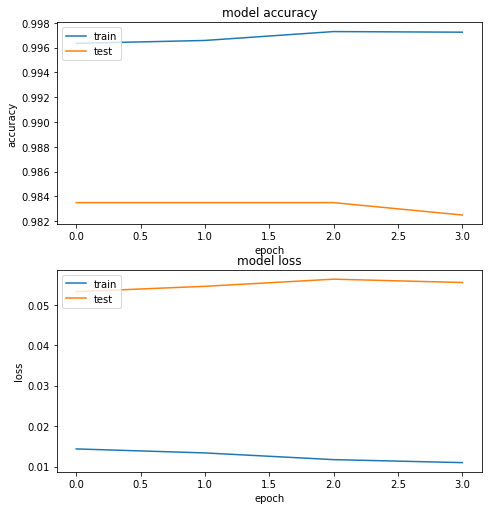

In [21]:
show_history(history_long_res)

### Now let's create the same long model with shortcut and train entire model in one step

In [22]:
inp = keras.layers.Input(shape=(784,))
out = Dense(512, activation='relu')(inp)
out = Dropout(0.2)(out)
shortcut = out
out = Dense(512, activation='relu', kernel_initializer='zeros')(inp)
out = Dropout(0.2)(out)
out = Dense(512, activation='relu', kernel_initializer='zeros')(out)
out = Dropout(0.2)(out)
out = keras.layers.Add()([out, shortcut])
out = Dense(n_classes, activation='softmax')(out)
model_long_res2 = keras.Model(inputs=[inp], outputs=[out])
model_long_res2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [23]:
accuracy_long_res2, t_long_res2, history_long_res2 = train_model(model_long_res2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.3135 - acc: 0.9108 - val_loss: 0.1565 - val_acc: 0.9536
Epoch 2/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1407 - acc: 0.9592 - val_loss: 0.1038 - val_acc: 0.9704
Epoch 3/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1001 - acc: 0.9708 - val_loss: 0.0908 - val_acc: 0.9731
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0782 - acc: 0.9772 - val_loss: 0.0794 - val_acc: 0.9763
Epoch 5/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0649 - acc: 0.9816 - val_loss: 0.0744 - val_acc: 0.9777
Epoch 6/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0548 - acc: 0.9841 - val_loss: 0.0748 - val_acc: 0.9759
Epoch 7/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0472 - acc: 0.9864 - val_loss: 0.0628 - 

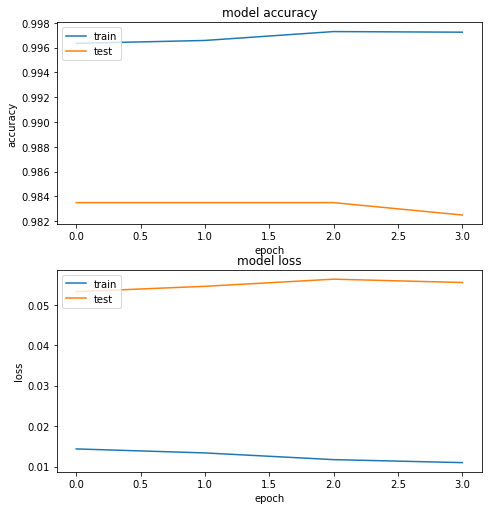

In [24]:
show_history(history_long_res)

## Printing summary

In [25]:
import pandas as pd
data = np.array([[accuracy_short, accuracy_long, accuracy_long_res, accuracy_long_res2],
        [t_short,t_long,t_short2+t_long_res,t_long_res2]])
data[0] = (1-data[0])*100 # convert to %-error
df = pd.DataFrame(data, ['error (%)', 'calc. time'], ['simple','long','residual (two steps)', 'residual (one step)'])
df.head()

simple       long  residual (two steps)  residual (one step)
error (%)    1.700000   1.910000              1.650000              1.72000
calc. time  40.691138  20.911304             45.394073             35.97874